In [22]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd

import random
import os
import sys

src_dir = os.path.join(os.getcwd(), '..', 'src')
sys.path.append(src_dir)

from d00_utils.get_data_counts import get_data_counts

In [4]:
parent_dir = os.path.dirname(os.getcwd())
data_dir = os.path.join(parent_dir, "data/d0-raw_data")
plant_names = os.listdir(data_dir)

print(plant_names)
print(len(plant_names))

['Alstonia Scholaris (P2)', 'Arjun (P1)', 'Chinar (P11)', 'Gauva (P3)', 'Jamun (P5)', 'Jatropha (P6)', 'Lemon (P10)', 'Mango (P0)', 'Pomegranate (P9)', 'Pongamia Pinnata (P7)']
10


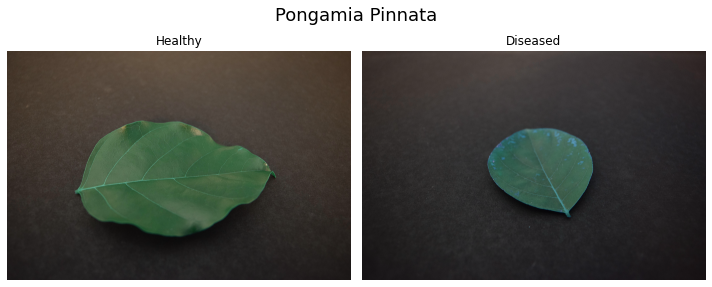

In [78]:
random.seed(2022)

viz_dir = os.path.join(parent_dir, "visualizations")

for index, plant_name in enumerate(plant_names):
    plant_path = os.path.join(data_dir, plant_name)

    # Create a separate figure for each plant
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    short_name = plant_name[:plant_name.find(" (")]
    fig.suptitle(short_name, y=0.9, fontsize=18)

    # Pick a randon healthy plant for each species
    healthy_path = os.path.join(plant_path, "healthy")
    random_healthy_plant = random.choice(os.listdir(healthy_path))
    random_healthy_plant_path = os.path.join(healthy_path, random_healthy_plant)
    # Display the healthy plant
    healthy_img = cv2.imread(random_healthy_plant_path)
    axs[0].imshow(healthy_img)
    axs[0].set_title("Healthy")
    axs[0].axis("off")

    # Pick a random diseased plant for each species
    diseased_path = os.path.join(plant_path, "diseased")
    random_diseased_plant = random.choice(os.listdir(diseased_path))
    random_diseased_plant_path = os.path.join(diseased_path, random_diseased_plant)
    diseased_img = cv2.imread(random_diseased_plant_path)
    # Display the diseased plant
    axs[1].imshow(diseased_img)
    axs[1].set_title("Diseased")
    axs[1].axis("off")
    fig.tight_layout()

    fig.savefig(f"{viz_dir}/{short_name}")

    # Only show the last plant
    if index == 9:
        plt.show()
    else:
        plt.close(fig)

In [23]:
get_data_counts(data_dir)

,Healthy,Diseased,Total
Plant Name,,,
Alstonia Scholaris (P2),179,254,433
Arjun (P1),220,232,452
Chinar (P11),103,120,223
Gauva (P3),277,142,419
Jamun (P5),279,345,624
Jatropha (P6),133,124,257
Lemon (P10),159,77,236
Mango (P0),170,265,435
Pomegranate (P9),287,272,559
